In [4]:
#MODULE IMPORTS
import sys
import json
import os
import warnings
import numpy
warnings.filterwarnings('ignore')
sys.path.append(".")

# runmanager imports
from utils.runmanager.runmanager import RunManager
from utils.runmanager.camrunmanager import CamRunManager 
from utils.runmanager.proberunmanager import ProbeRunManager
from utils.runmanager.temprunmanager import TempRunManager
from utils.runmanager.ldvrunmanager import LDVRunManager

In [5]:
input = {
    "DEVICE_NAME": "SCOPE",
    "DEVICE_TYPE": "PROBE",
    "DEVICE_SPECIES": "PROBE",
    
    "EXP_SHOT_NOS": [0, 1, 2],
    "BKG_SHOT_NOS": [],
    
    "BKG_NAME": "DARKFIELD",
    "BACKGROUND_STATUS": "RAW",

    "NORM_PLOT":False,
    
    "OPERATIONS": {
        "SHOW_SINGLESHOT_PLOTS":False,
        "LINEOUT_BIN_NO":100,
        "SHOW_AVERAGE_SHOTS":True
    }
}


Lengths: 
1: 10000, 2: 10000, 3: 10000, 4: 10000
N 10000
dt 4e-11
Lengths: 
1: 10000, 2: 10000, 3: 10000, 4: 10000
N 10000
dt 4e-11
Lengths: 
1: 10000, 2: 10000, 3: 10000, 4: 10000
N 10000
dt 4e-11
selecting appropriate data dictionary ... 

Plot ... 



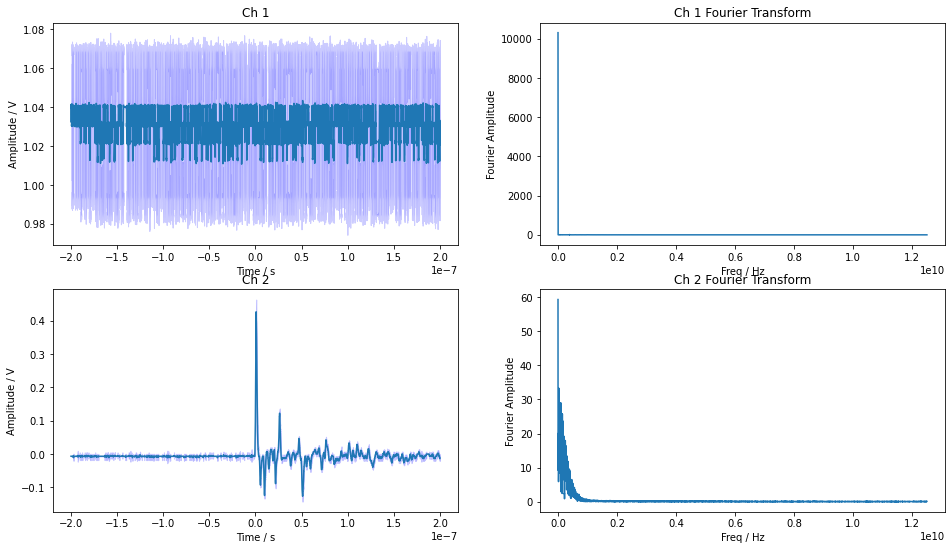

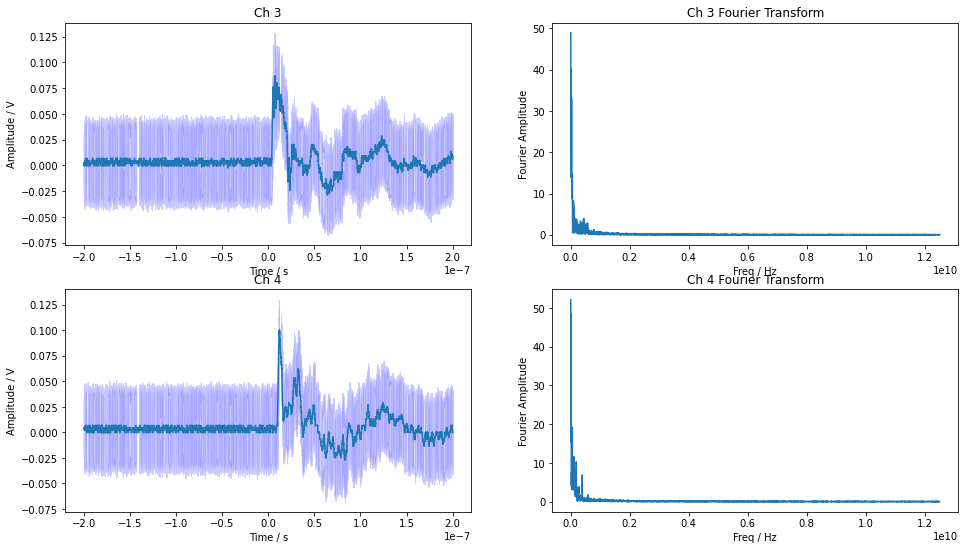

Run terminated successfully without errors. 



In [6]:
def main():

    parent_dir = "/eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data"
    folder_name = "scope_test"
    files = [
        "fireball_commisioning__ALL_20250523163303190.csv",
        "fireball_commisioning__ALL_20250523163240372.csv",
        "fireball_commisioning__ALL_20250523163217568.csv"
    ]
    

    # initialise dictionary from hardcoded valuesbb
    paths_dict = {
        i:os.path.join(parent_dir, folder_name, file) for i, file in enumerate(files)
    }


    #######
    # RUN #
    #######
    
    # Initialise the runmanager as appropriate for each device.
    runmanagerdict : dict[str, type[RunManager]]= {
        "PROBE":ProbeRunManager, 
        "CAMERA": CamRunManager,
        "PT100": TempRunManager,
        "LDV": LDVRunManager,
    }
    
    # INITIALIZE THE APPROPRIATE RUN MANAGER
    run_manager = runmanagerdict[input["DEVICE_TYPE"]](
        input=input, # input configuration
        #data_paths_dict=data_paths_dict # select appropriate dictionary from the dict_of_dicts variable.
        data_paths_dict=paths_dict
    )

    #Execute the run.
    run_manager.run()
    print("Run terminated successfully without errors. \n")

main()